### Prompting Techniques

In [15]:
import openai
import os
openai.api_key= 'Api key'

In [25]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
         # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

### Tree of Thoughts (ToT)

### Retrieval Augmented Generation (RAG)

##### RAG takes an input and retrieves a set of relevant/supporting documents given a source (e.g., Wikipedia). The documents are concatenated as context with the original input prompt and fed to the text generator which produces the final output. This makes RAG adaptive for situations where facts could evolve over time. This is very useful as LLMs's parametric knowledge is static. RAG allows language models to bypass retraining, enabling access to the latest information for generating reliable outputs via retrieval-based generation.

### Automatic Reasoning and Tool-use (ART)

In [26]:
prompt = """
Does the sentence contain an anachrornism? Yes/No.
Input: President George H. W. Bush called his generals at the outset of the
Gulf War. """

response = get_completion(prompt)
print(response)

No.


Does the sentence contain an anachrornism? Yes/No.
Input: President George H. W. Bush called his generals at the outset of the
Gulf War. Q1: [search] When was President George H. W. Bush, president?
#1: George H. W. Bush's tenure started on January 20, 1989,
and ended on January 20, 1993.
Q2: [search] When was the Gulf War fought? #2: The Gulf War was a 1990–1991
Q3: [subquestion] Could these entities have co-existed? #3: Yes. Their time
periods intersect.
Q4: [generate output] Is this an anachronism? #4: No Q5: [EOQ] Ans: No

### Automatic Prompt Engineer (APE)

In [20]:
prompt = """
I went to the market and bought 10 apples. I gave 2 apples to the neighbor and 2 to the repairman. I then went and bought 5 more apples and ate 1. How many apples did I remain with?
Let's work this out in a step by step way to be sure we have the right answer.
"""


response = get_completion(prompt)
print(response)

1. Start with 10 apples.
2. Gave 2 to the neighbor, so now have 8 apples.
3. Gave 2 to the repairman, so now have 6 apples.
4. Bought 5 more apples, so now have 11 apples.
5. Ate 1 apple, so now have 10 apples.

Therefore, you remained with 10 apples.


### Active-Prompt

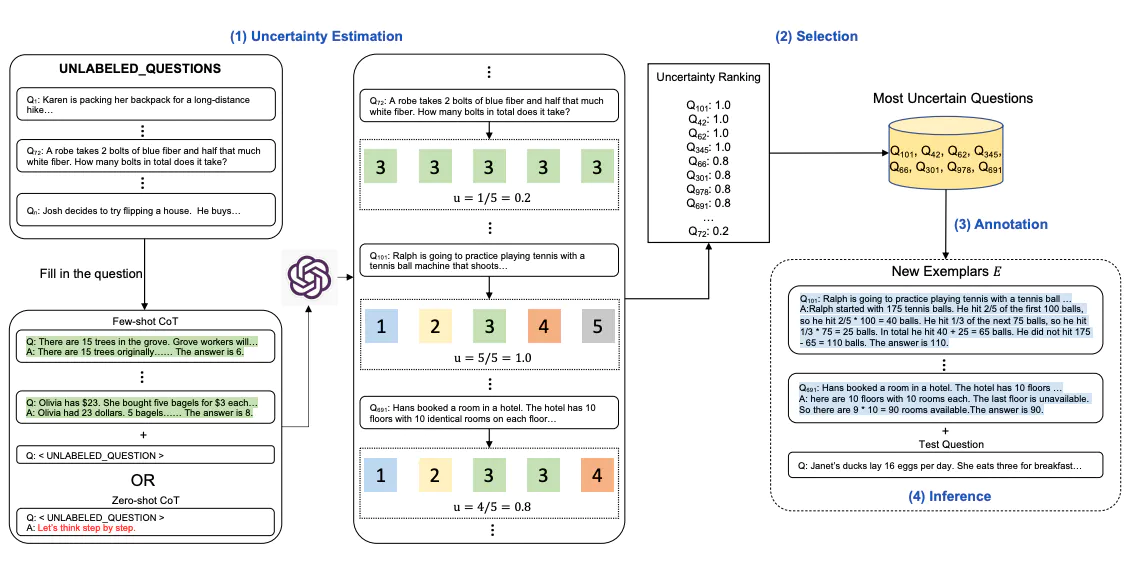

### Directional Stimulus Prompting

In [16]:
prompt = """
Article: (CNN) For the first time in eight years, a TV legend returned to doing what he does best. Contestants told to "come on down!"
on the April 1 edition of "The Price is Right" encountered not host Drew Carey  but another familiar face in charge of the proceeding.
Instead, there was Bob Barker, who hosted the TV game show for 35 years before stepping down in 2007. Looking spry at 91. Barker handled
the price-guessing game of the show, the classic "Lucky Seven" before turning hosting duties over to Carey, who finished up. Despite
being away from the show for most of the past eight years, Barker didn't seem to miss a beat.

Q: Summarize the above article briefly in 2-3 sentences based on the hint.
Hint: Bob Barker;TV;April 1;The Price is Right;2007;91.
"""

response = get_completion(prompt)
print(response)

Bob Barker, the former host of "The Price is Right," returned to the show on April 1, 2015, for the first time in eight years. At 91 years old, Barker hosted the price-guessing game "Lucky Seven" before turning the hosting duties over to current host Drew Carey.


In [17]:
prompt = """
Article: (CNN) For the first time in eight years, a TV legend returned to doing what he does best. Contestants told to "come on down!"
on the April 1 edition of "The Price is Right" encountered not host Drew Carey  but another familiar face in charge of the proceeding.
Instead, there was Bob Barker, who hosted the TV game show for 35 years before stepping down in 2007. Looking spry at 91. Barker handled
the price-guessing game of the show, the classic "Lucky Seven" before turning hosting duties over to Carey, who finished up. Despite
being away from the show for most of the past eight years, Barker didn't seem to miss a beat.

Q: Summarize the above article briefly in 2-3 sentence
"""

response = get_completion(prompt)
print(response)

Bob Barker, who hosted "The Price is Right" for 35 years before stepping down in 2007, returned to the show on April 1 to handle the price-guessing game "Lucky Seven." Despite being away from the show for most of the past eight years, Barker didn't seem to miss a beat.


### ReAct Prompting

In [6]:
from langchain.llms import OpenAI
from langchain.agents import load_tools
from langchain.agents import initialize_agent

In [12]:
llm = OpenAI(model_name="text-davinci-003" ,temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(tools, llm, agent="zero-shot-react-description", verbose=True)

In [13]:
agent.run("Who is Olivia Wilde's boyfriend? What is his current age raised to the 0.23 power?")



> Entering new AgentExecutor chain...
 I need to find out who Olivia Wilde's boyfriend is and then calculate his age raised to the 0.23 power.
Action: Wikipedia
Action Input: Olivia Wilde
Observation: Page: Olivia Wilde
Summary: Olivia Jane Cockburn ( KOH-bərn; born March 10, 1984), known professionally as Olivia Wilde, is an American actress and filmmaker. She played Remy "Thirteen" Hadley on the medical-drama television series House (2007–2012), and has appeared in the films Tron: Legacy (2010), Cowboys & Aliens (2011),  The Incredible Burt Wonderstone (2013), and The Lazarus Effect (2015). Wilde made her Broadway debut in 2017, playing Julia in 1984. In 2019, she directed her first film, the teen comedy Booksmart (2019), for which she won the Independent Spirit Award for Best First Feature. Wilde's second feature as director, Don't Worry Darling, was released in 2022.

Page: Olivia Wilde filmography
Summary: Olivia Wilde is an American actress and filmmaker. She is known for her r

"Olivia Wilde's boyfriend is Harry Styles and his current age raised to the 0.23 power is 2.1340945944237553."

### Multimodal CoT Prompting

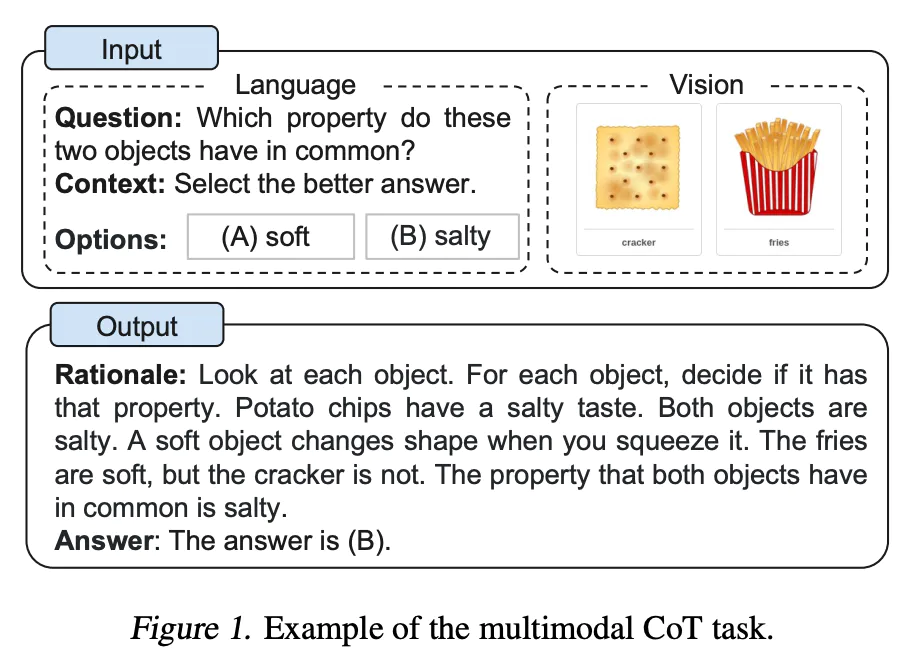